<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Установка-и-импорт-библиотек" data-toc-modified-id="Установка-и-импорт-библиотек-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Установка и импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Распределение-параметров" data-toc-modified-id="Распределение-параметров-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Распределение параметров</a></span></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li></ul></li><li><span><a href="#Исследование-кластеризации" data-toc-modified-id="Исследование-кластеризации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследование кластеризации</a></span><ul class="toc-item"><li><span><a href="#Метод-K-Means-и-Mini-batch-K-Means" data-toc-modified-id="Метод-K-Means-и-Mini-batch-K-Means-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Метод K-Means и Mini-batch K-Means</a></span></li><li><span><a href="#Метод-DBSCAN" data-toc-modified-id="Метод-DBSCAN-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Метод DBSCAN</a></span></li><li><span><a href="#Иерархическая-кластеризация" data-toc-modified-id="Иерархическая-кластеризация-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Иерархическая кластеризация</a></span></li><li><span><a href="#Выбор-метода-кластеризации" data-toc-modified-id="Выбор-метода-кластеризации-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Выбор метода кластеризации</a></span></li></ul></li><li><span><a href="#Поиск-соответствий" data-toc-modified-id="Поиск-соответствий-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Поиск соответствий</a></span><ul class="toc-item"><li><span><a href="#Поиск-с-помощью-Annoy" data-toc-modified-id="Поиск-с-помощью-Annoy-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Поиск с помощью Annoy</a></span></li><li><span><a href="#Поиск-с-помощью-FAISS" data-toc-modified-id="Поиск-с-помощью-FAISS-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Поиск с помощью FAISS</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

ФИО автора работы: Богуто Елена Александровна   

telegram: @BelkaBoguto   

e-mail: slush1ster@gmail.com

# Мастерская 2 - DS+: Мэтчинг товаров

## Исходные данные

Обучающий датасет, валидационный датасет и base (датасет со всеми товарами) содержат индексы товаров из base, обезличенные признаки товаров и “правильные ответы” - индексы наиболее подходящих товаров-аналогов (кроме валидационного датасета - для него “правильные ответы” содержатся в отдельном файле). Данные достаточно объемные (более 2 Гб). Также существует уменьшенная (~10% от исходной) версия датасета.

В качестве метрики используется accuracy@n.
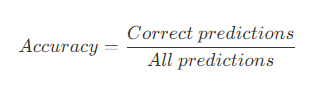
"Представим расчет метрики в цикле, перебирая все предложенные моделью ответы. При этом каждое предсказание содержит в себе не 1 ответ, а сразу n, и если среди предложенных вариантов окажется правильный - числитель и знаменатель увеличиваются на 1. А если нет ни одного - то на 1 увеличивается только знаменатель. В нашей задаче n = 5. Хорошо бы добиться accuracy@5 ≥ 0,7."

## План проекта

1. Загрузить данные (воспользовавшись способом из обучающего примера, т.к. данные большие)
2. Провести исследовательский анализ
3. Изучить данные с помощью FAISS
4. Разработать ранжирующую модель
5. Написать вывод

## Установка и импорт библиотек

In [ ]:
!pip install --upgrade scikit-learn -q

In [ ]:
!pip install faiss-cpu==1.7.4 -q

In [ ]:
!pip install --user annoy -q

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import faiss
import requests
import os
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os.path

from tqdm.notebook import tqdm
from urllib.parse import urlencode
from zipfile import ZipFile

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [ ]:
import time

from time import time
from sklearn.cluster import (KMeans, 
                             MiniBatchKMeans,
                            DBSCAN)
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [ ]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 75)

## Загрузка данных

In [ ]:
def downloader(size: str='small'):
    if size not in ['small', 'large']:
        raise Exception('Unknown Argument')
    
    if os.path.isfile('content/data.zip'):
        return
    
    elif size == 'small':
        public_key = 'https://disk.yandex.ru/d/YQElc_cNQQLSOw'
    else:
        public_key = 'https://disk.yandex.ru/d/BBEphK0EHSJ5Jw'

    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']

    download_response = requests.get(download_url)

    Path('content').mkdir(parents=True, exist_ok=True)
    open('content/data.zip', 'x') 
    
    with open('content/data.zip', 'wb') as f:
        f.write(download_response.content)

    zip_path = ('content/data.zip')

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()

In [ ]:
#downloader('large')

Слишком большие файлы, чтобы выкладывать их куда-то явно. Поэтому я предполагаю, что у проверяющего эти файлы тоже должны быть. Файлы с полным набором данных были переименованы в `..._large`. Файлы с уменьшенными наборами остались без изменений.  

In [ ]:
# прочтем большой базовый датафрейм

df_base_large = pd.read_csv("base_large.csv", index_col=0)
df_base_large.head()

In [ ]:
# оценим объем данных

df_base_large.shape

In [ ]:
# прочтем большой тренировочный датафрейм

df_train_large = pd.read_csv("train_large.csv", index_col=0)
df_train_large.shape

In [ ]:
# прочтем большой валидационный датафрейм

df_validation_large = pd.read_csv("validation_large.csv", index_col=0)
df_validation_large.shape

In [ ]:
# прочтем большой файл с "ответами"

df_validation_answer_large = pd.read_csv("validation_answer_large.csv", index_col=0)
df_validation_answer_large.shape

In [ ]:
# прочтем малый базовый датафрейм

df_base_small = pd.read_csv("base.csv", index_col=0)
df_base_small.head()

In [ ]:
# оценим размер малого файла

df_base_small.shape

In [ ]:
# прочтем малый тренировочный датафрейм

df_train_small = pd.read_csv("train.csv", index_col=0)
df_train_small.shape

In [ ]:
# прочтем малый валидационный датафрейм

df_validation_small = pd.read_csv("validation.csv", index_col=0)
df_validation_small.shape

In [ ]:
# прочтем малый файл с "ответами

df_validation_answer_small = pd.read_csv("validation_answer.csv", index_col=0)
df_validation_answer_small.shape

Какие именно данные нам переданы на изучение:

- файл `base` - анонимизированный набор товаров. Каждый товар представлен как уникальный id (1-base, 2-base и т.д.) и вектор признаков размерностью 72.
- файл `train` - обучающий датасет. Каждая строка - один товар, для которого известен уникальный id (0-query, 1-query и т.д.), вектор признаков и id товара из `base.csv`, который максимально похож на него по мнению экспертов.
- файл `validation` - датасет с товарами (уникальный id и вектор признаков), для которых надо найти наиболее близкие товары из `base.csv`.
- файл `validation_answers` - правильные ответы к файлу `validation`.

Общая задача звучит, как "разработать алгоритм, который для всех товаров из `validation.csv` предложит несколько вариантов наиболее похожих товаров из `base.csv`.

Метрика объявлена ранее - accuracy@5.

Предостален некий baseline, который можно повторить, для первичного понимания работы алгоритма.

## Исследовательский анализ данных

In [ ]:
# посмотрим общий вид данных большого файла

df_base_large.describe()

In [ ]:
df_base_large.info()

In [ ]:
df_base_large.isna().sum()

Пропусков в данных нет. Все колонки, кроме индекса, численные.

Проверим, что с остальными данными - аналогичная картина.

In [ ]:
df_train_large.info()

In [ ]:
df_validation_large.info()

In [ ]:
df_base_small.info()

In [ ]:
df_train_small.info()

In [ ]:
df_validation_small.info()

### Поиск дубликатов

In [ ]:
# проверим на полные дубликаты

df_base_large.duplicated().sum()

In [ ]:
# проверим на полные дубликаты тренировочный большой файл

df_train_large.duplicated().sum()

In [ ]:
# проверим на полные дубликаты валидационный большой файл

df_validation_large.duplicated().sum()

In [ ]:
# проверим на полные дубликаты большой файл с "ответами"

df_validation_answer_large.duplicated().sum()

In [ ]:
# проверим на полные дубликаты малый общий файл

df_base_small.duplicated().sum()

In [ ]:
# проверим на полные дубликаты малый тренировочный файл

df_train_small.duplicated().sum()

In [ ]:
# проверим на полные дубликаты валидационный большой файл

df_validation_small.duplicated().sum()

In [ ]:
# проверим на полные дубликаты малый файл с "ответами"

df_validation_answer_small.duplicated().sum()

Получается, у нас есть дубликаты строк вплоть до значений индекса в малой выборке. Проверим это.

In [ ]:
# посчитаем количество уникальных индексов

df_base_small.index.nunique()

Все верно: в датафрейме 291813 строк, из которых 280535 строк уникальны, а 11278 строк повторяют существующие. От таких повторов нужно избавляться.

Что касается повторов в "ответах" - это повторы в колонке "Аналогичного товара". По-моему, это нормально, что разным товарам из валидационной выборки оказались наиболее близки одни и те же товары из базовой выборки. Отсюда и дубликаты.

In [ ]:
# количество индексов - т.е. уникальных товаров для сравнения

df_validation_answer_large.index.nunique()

In [ ]:
# количество аналогичных сопоставленных товаров

df_validation_answer_large.nunique()

Убираем дубликаты в малых датафреймах, кроме датафреймов с валидационной выборкой и "ответами". Полагаю, для расчетов нам будет важна их размерность.

In [ ]:
df_base_small = df_base_small.drop_duplicates()
df_base_small.shape

In [ ]:
df_train_small = df_train_small.drop_duplicates()
df_train_small.shape

### Распределение параметров

In [ ]:
# построим распределение для всех параметров

fig2, axes = plt.subplots(nrows=18, ncols=4, figsize=(15,60))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i, ax in enumerate(axes.flatten()):
    df_base_large[df_base_large.columns[i]].hist(ax=ax , bins = 30)
    ax.set_title(df_base_large.columns[i])

Можно видеть, что часть признаков распределена необычно.    
Так, например, распрелеление признаков 6, 21, 25, 33, 44, 59, 65, 70 визуально отличается от распределения остальных параметров.   
Признаки 21, 25, 59, 65 и 70 можно попробовать удалить из данных.

In [ ]:
# создадим датафреймы без "подозрительных" параметров

base_large = df_base_large.drop(columns=['21', '25', '59', '65', '70'])
base_large.shape

In [ ]:
# аналогично уберем признаки из других датафреймов

train_large = df_train_large.drop(columns=['21', '25', '59', '65', '70'])
validation_large = df_validation_large.drop(columns=['21', '25', '59', '65', '70'])

base_small = df_base_small.drop(columns=['21', '25', '59', '65', '70'])
train_small = df_train_small.drop(columns=['21', '25', '59', '65', '70'])
validation_small = df_validation_small.drop(columns=['21', '25', '59', '65', '70'])

Оставляем в данных 67 признаков вместо 72.

Скалировать данные нет особого смысла - значения всех параметров сосредоточены в областях 10^2-10^3. Это близкие значения.

### Проверка на мультиколлинеарность

In [ ]:
#
#import seaborn as sns
#import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [12, 8]

#sns.heatmap(df_base_small.corr(), cbar=True, cmap= 'coolwarm')

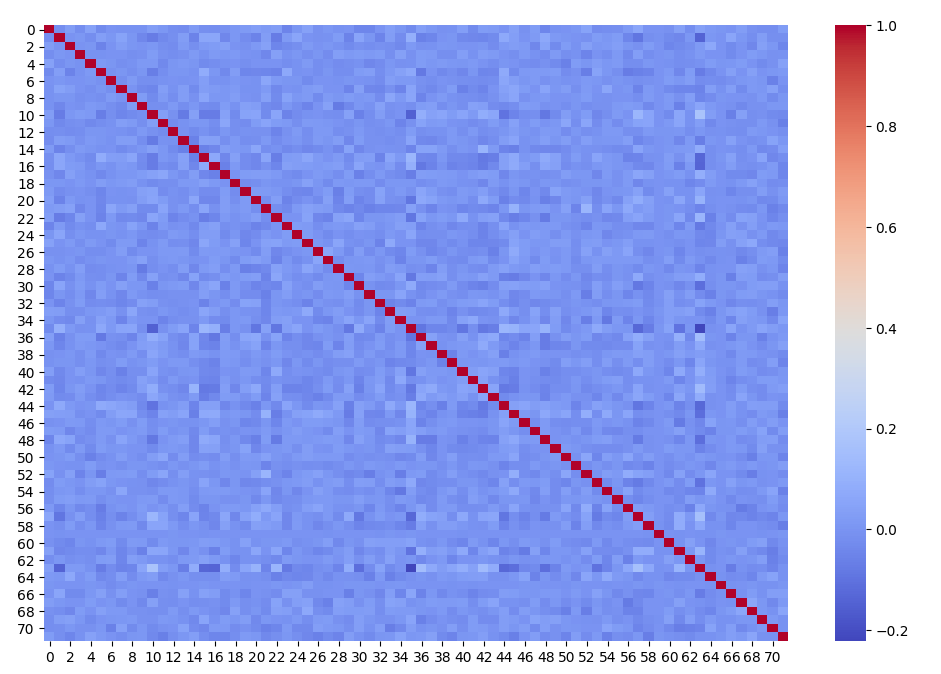

In [ ]:
#sns.heatmap(df_base_large.corr(), cbar=True, cmap= 'coolwarm')

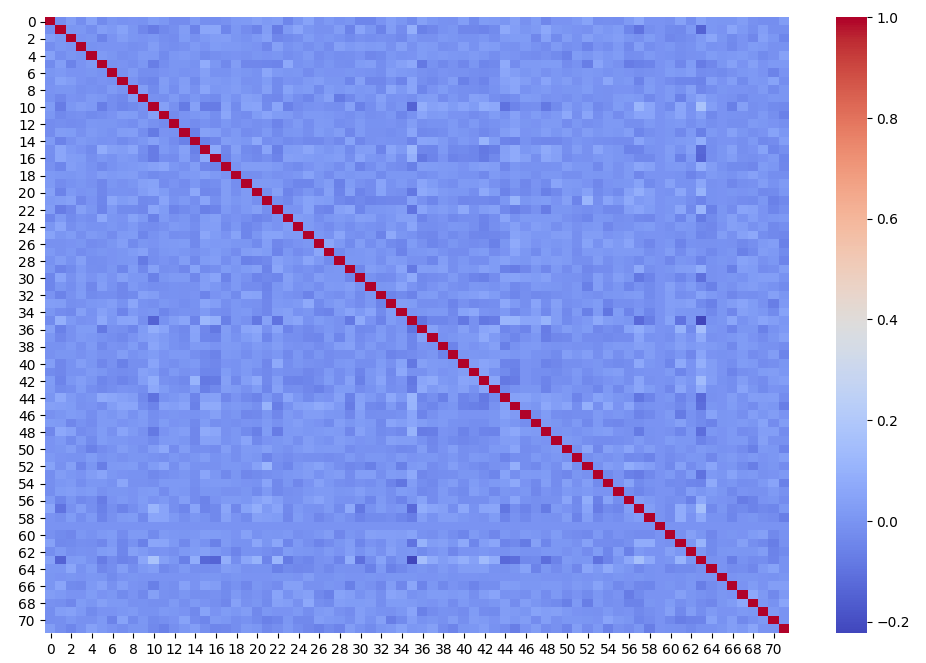

Линейной корреляции между признаками не отмечено.

## Исследование кластеризации

На вэбинарах были озвучены следующие основные методы кластеризации:
- метод K-Means
- метод DBSCAN
- иерархический алгоритм кластеризации
- графовые методы

И методы оценки кластеризации:
- "метод локтя"
- индекс Дэвиса-Болдина
- метод силуэта
- индекс Хопкинса
- метрики Среднее внутрикластерное расстояние, Среднее межкластерное расстояние, Гомогенность, Полнота, V-мера, коэффициент силуэта

### Метод K-Means и Mini-batch K-Means

Для модели K-Means в качестве метрики часто применяется "мето локтя". Необходимо несколько раз прогнать модель с разными количествами кластеров, собрать значения "инерции", и построить график. В точке излома будет находится оптимальное количество кластеров.

In [ ]:
# скалирум наши данные, это важно для модели k-means

scaler = StandardScaler()

scaled_base_small = scaler.fit_transform(base_small)

In [ ]:
km_scores= []
for i in range(400, 4000, 400):
    km = KMeans(init="k-means++", n_clusters=i, random_state=0).fit(scaled_base_small)
    preds = km.predict(scaled_base_small)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(scaled_base_small)))
    km_scores.append(-km.score(scaled_base_small))

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Метод локтя для определения количества кластеров\n",fontsize=16)
plt.scatter(x=[i for i in range(400, 4000, 400)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Количество кластеров",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(400, 4000, 400)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Можно оценить "локоть" в величину 2000 кластеров.

Сохраняю для скорости перепроведения тетради:
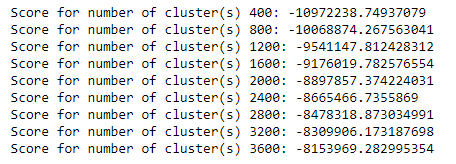
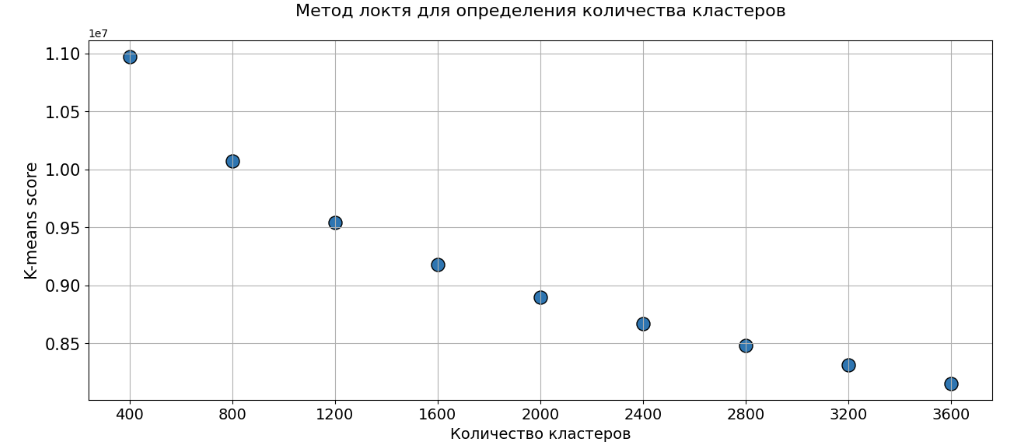

In [ ]:
# инициализиуем лучшую модель k-means

k_means = KMeans(init="k-means++", n_clusters=2000, random_state=0)
start0 = time()
k_means.fit(scaled_base_small)
end0 = time()
t_k_means = (end0 - start0) / 60
t_k_means

In [ ]:
# зафиксируем метки кластеров

labels_km = k_means.labels_

In [ ]:
# рассчитаем коэффициент силуэта

sil_km = metrics.silhouette_score(scaled_base_small, labels_km, metric='euclidean')
print("Коэффициент силуэта:", sil_km)

Тоже очень долго считает:
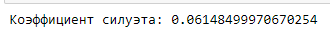

In [ ]:
db_km = metrics.davies_bouldin_score(scaled_base_small, labels_km)
print("Индекс Дэвиса-Боулдина:", db_km)

ch_km = metrics.calinski_harabasz_score(scaled_base_small, labels_km)
print("Индекс Калински-Харабаша:", ch_km)

Описание работы **коэффициента силуэта**:
- Оценка ограничена от -1 за неправильную кластеризацию до +1 за высокоплотную кластеризацию. Баллы около нуля указывают на перекрывающиеся кластеры.
- Оценка выше, когда кластеры плотные и хорошо разделенные, что относится к стандартной концепции кластера.

Описание **индекса Калински-Харабаша**:
- Индекс представляет собой отношение суммы дисперсии между кластерами и дисперсии внутри кластера для всех кластеров (где дисперсия определяется как сумма квадратов расстояний)
- Оценка выше, когда кластеры плотные и хорошо разделены, что соответствует стандартной концепции кластера.

Описание **индекса Дэвиса-Боулдина**:
- Этот индекс показывает среднее «сходство» между кластерами, где сходство — это мера, сравнивающая расстояние между кластерами с размером самих кластеров.
- Ноль — это наименьшая возможная оценка. Значения, близкие к нулю, указывают на лучшее разбиение.

Попробуем теперь произвести расчеты с помощью метода **Mini-Batches K_Means**.

In [ ]:
# произведем поиск по количеству кластеров

mbk_scores= []
for i in range(250, 5250, 250):
    mini_bk = MiniBatchKMeans(init="k-means++", n_clusters=i, max_no_improvement=10,
                                verbose=0, random_state=0).fit(scaled_base_small)
    preds_m = mini_bk.predict(scaled_base_small)
    
    print("Score for number of cluster(s) {}: {}".format(i,mini_bk.score(scaled_base_small)))
    mbk_scores.append(-mini_bk.score(scaled_base_small))

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Метод локтя для определения количества кластеров\n",fontsize=16)
plt.scatter(x=[i for i in range(250, 5250, 250)],y=mbk_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Количество кластеров",fontsize=14)
plt.ylabel("Mini-Batch K-means score",fontsize=15)
plt.xticks([i for i in range(250, 5250, 250)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Пожалуй, и в этом методе точка перегиба находится где-то в области 3000 кластеров.

Сохраняю для скорости перезапуска тетради:
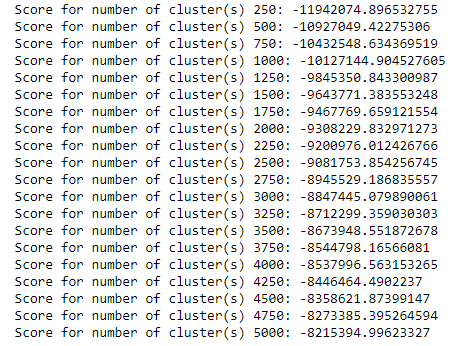
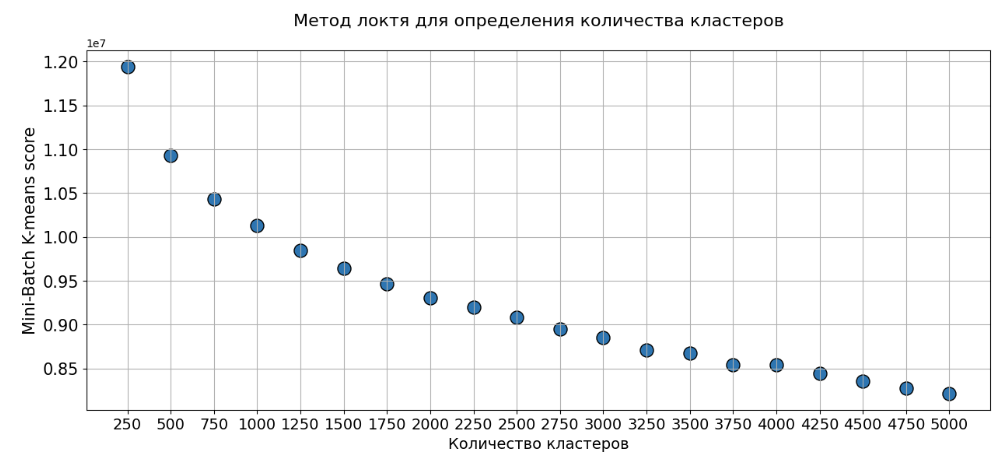

In [ ]:
# инициализируем модель мини-батчей

mbk = MiniBatchKMeans(init="k-means++",n_clusters=3000, max_no_improvement=10, verbose=0, random_state=0)

start1 = time()

mbk.fit(scaled_base_small)

end1 = time()
t_mini_batch = (end1 - start1) / 60
t_mini_batch

In [ ]:
# зафиксируем метки кластеров

labels_mbk = mbk.labels_

In [ ]:
# рассчитаем коэффициент силуэта

sil_mbk = metrics.silhouette_score(scaled_base_small, labels_mbk, metric='euclidean')
print("Коэффициент силуэта:", sil_mbk)

Зафиксирую, так как долгий расчет
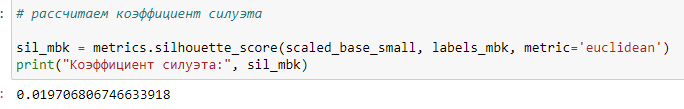

In [ ]:
db_mbk = metrics.davies_bouldin_score(scaled_base_small, labels_mbk)
print("Индекс Дэвиса-Боулдина:", db_mbk)

ch_mbk = metrics.calinski_harabasz_score(scaled_base_small, labels_mbk)
print("Индекс Калински-Харабаша:", ch_mbk)

Величина коэффициента силуэта в три раза ниже, чем у модели K-Means, и все еще лежит в области околонулевых значений. Величины других коэффициентов чуть ниже по сравнению с методом K-Means.

### Метод DBSCAN

Метод, по описанию, является более требовательным к памяти при расчетах, нежели метод K-Means. Как можно сразу оптимизировать процесс?  В описании метода предлагают использовать кластеризацию OPTICS в сочетании с extract_dbscan методом. Или сжать данные, используя BIRCH.

In [ ]:
for samples in range(2, 10, 2):
    for ep in range(2, 8, 1):
        dbs = DBSCAN(eps=ep/10, min_samples=samples).fit(scaled_base_small)
        labs = dbs.labels_
        metr = metrics.davies_bouldin_score(scaled_base_small, labs)
        n_clust = len(set(labs))
        print("Score for number of cluster(s):", samples, ep, metr, n_clust)

Сохраняю для скорости перезапуска тетради:
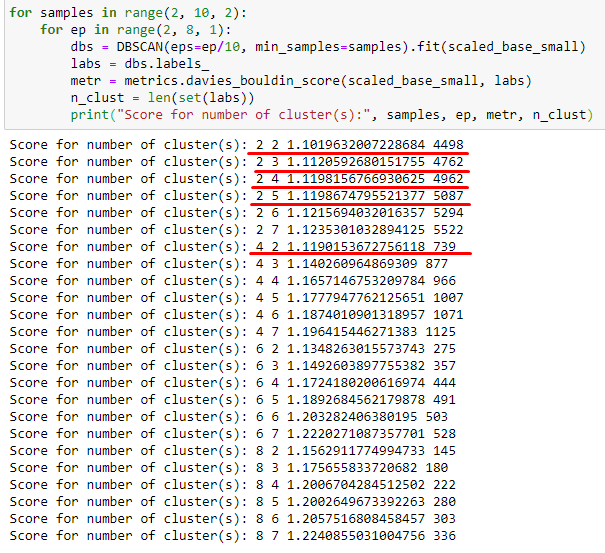

Еслил ориентироваться на значение индекса Дэвиса-Боулдина, то чем ближе значение индекса к нулю, тем лучше сформировалис кластеры. Наилучшие значения метрики получились в случаях:
- минимальное количество образцов вокруг кластера - 2, с расстоянием вокруг образца от 0,2 до 0,5;
- и минимальное количество образцов вокруг кластера - 4, с расстояние вокруг образца 0,2.

При этом, в случае минимум 4 соседей для кластера количество этих кластеров определено как 739. А если соседей будет только 2, то кластеров получается от 4500 до 5100 штук.

In [ ]:
# иницируем лучшую модель

dbscan = DBSCAN(eps=0.2, min_samples=4)

start2 = time()

dbscan.fit(scaled_base_small)

end2 = time()
t_dbscan = (end2 - start2) / 60
t_dbscan

In [ ]:
# зафиксируем метки кластеров

labels_dbscan = dbscan.labels_

In [ ]:
# количество сформированных кластеров

n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_clusters_

In [ ]:
# рассчитаем индексы

db_dbscan = metrics.davies_bouldin_score(scaled_base_small, labels_dbscan)
print("Индекс Дэвиса-Боулдина:", db_dbscan)

ch_dbscan = metrics.calinski_harabasz_score(scaled_base_small, labels_dbscan)
print("Индекс Калински-Харабаша:", ch_dbscan)

In [ ]:
# рассчитаем коэффициент силуэта

sil_dbscan = metrics.silhouette_score(scaled_base_small, labels_dbscan, metric='euclidean')
print("Коэффициент силуэта:", sil_dbscan)

Долгий расчет.
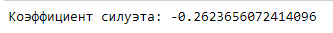
ОТрицательное значение указывает на неверную кластеризацию.

Несмотря на описание метода, модель обработала данные весьма быстро. Не пришлось использовать другие модификации методики.

### Иерархическая кластеризация

Неприменима при таком объеме входящих данных.

Попробовал через FeatureAgglomeration, но не понял ее смысла. Количество кластеров меньше или равно количеству параметров данных. Что дальше с этим делать - неясно.

### Выбор метода кластеризации

Получается, что удалось рассмотреть 4 методики, и наилучшей кажется методика Mini-Batch K-Means. Она быстрее рассчитывается, обладает неплохими значениями использованных метрик. 

In [ ]:
scaled_base_large = scaler.fit_transform(base_large)

start3 = time()

mbk.fit(scaled_base_large)

end3 = time()
t_mini_batch_l = (end3 - start3) / 60
t_mini_batch_l

In [ ]:
labels_mbk_l = mbk.labels_
labels_mbk_l.shape

## Поиск соответствий

### Поиск с помощью FAISS

Сижу на винде, лень разбираться как задействовать GPU. 

In [ ]:
base_small_index = {k: v for k, v in enumerate(base_small.index.to_list())}

def accuracy_n(targets, predict, base_index=base_small_index):
    acc = 0
    for target, candidates in zip(targets.tolist(), predict):
        acc += int(target in [base_index[number] for number in candidates])

    return (acc / len(targets) * 100)

In [ ]:
# поиск обычным перебором занимает слишком много времени
# возьмем другой класс

#nlist = 1000  # number of clusters

#quantiser = faiss.IndexFlatL2(dimension)  

#index = faiss.IndexIVFFlat(quantiser, dimension, nlist,   faiss.METRIC_L2)

In [ ]:
#index = faiss.index_factory(dimension, "IVF262144,PQ64", faiss.METRIC_L2)

Для такой модификации индекса важно, чтобы на обучение и поиск подавались данные в той же размерности, что и размерность индекса. Наши данные сейчас содержат 68 колонок. Необходимо уменьшить их до 64.

 По совету в группе бибилиотека была сдаунгрейжена до 1.7.4., чтоб не ждать рассчетов до второго пришествия.

In [ ]:
# размерность малой выборки

print(base_small.shape)
print(validation_small.shape)

In [ ]:
# убираем колонки с "ненормальным распределением"

base_small_ni = base_small.drop(columns=['6', '33', '44', 'index'], axis=1)
validation_small_ni = validation_small.drop(columns=['6', '33', '44','index'], axis=1)

In [ ]:
# проверяем

print(base_small_ni.columns)
print(validation_small_ni.columns)

In [ ]:
# задаем гиперпараметры и инициируем метод

dims = 64
n_cells = 2000
quantizer = faiss.IndexFlatL2(dims)

idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells)

In [ ]:
start5 = time()

idx_l2.train(np.ascontiguousarray(base_small_ni.values).astype('float32'))

end5 = time()

t_faiss_2 = (end5 - start5) / 60
t_faiss_2

In [ ]:
idx_l2.add(np.ascontiguousarray(base_small_ni.values).astype('float32'))

In [ ]:
r2, idx2 = idx_l2.search(np.ascontiguousarray(validation_small_ni.values), 5)

In [ ]:
# проверяю вид найденных расстояний

r2

In [ ]:
# и индексов

idx2

In [ ]:
acc_f = 0

for target, el in zip(df_validation_answer_small['Expected'].values.tolist(), idx2.tolist()):
    acc_f += int(target in [base_small_index[r2] for r2 in el])
    
print(f'Accuracy@{5} = {acc_f / len(idx2):.1%}')

## Выводы

**Кластеризация**. Судя по всему, методы K-Means являются наиболее распространенными в случаях большого количества исследуемых данных. Границы весьма эфемерны: какое значение является большим, а какое еще нет. Также, очевидно, быстродействие метода зависит от используемого оборудования. Персональный ПК здесь не всегда лучший вариант.

Кроме наиболее распространенного метода K-Means существует его модификация - Mini-Batch K-Means. Он считает быстрее, но менее точно. И действительно, по значениям индексов Дэвиса-Боулдина и Калински-Харабаша видно, что просто K-Means показывает лучшие результаты.

Коэффициент силуэта в этой работе считался по 10 минут минимум, что сделало его неудобным для меня. Тем более, что его значения всегда указывали на "плохую кластеризацию".

**Осталось совершенно непонятным** куда же необходимо применить полученные кластеры? Как произвести расчет расстояний до центроидов кластеров при поиске соседей?

**Поиск соответствий**. Подергали FAISS.

С использованием FAISS данные обработаны до 61,5% значения метрики.

**Что можно было сделать лучше:**
- нас просили использовать еще другие метода кластеризации - не сделано
- попробовать библиотеку Qdrant - не сделано
- поискать соседей прямым подсчетом расстояний с использованием кластеров от методов кластеризации - не сделано
- использовать различные виды расстояний при использовании методов кластеризации и мэтчинга - не сделано. Следует отметить, что некоторые типы векторов мэтчинга могут использовать только один тип расстояния.
- работать не только на малом датасете, но и на большом - увы, моя пекарня не казенная.